
Sources: <br>
1 -> https://www.geeksforgeeks.org/convert-adjacency-matrix-to-adjacency-list-representation-of-graph/ <br>
2 -> https://www.programiz.com/dsa/kruskal-algorithm <br>
3 -> https://www.geeksforgeeks.org/count-number-trees-forest/ <br>

Problem: Find the minimum cost spanning forest, in which the goal is to identify k trees that span all nodes of a network in the minimum cost

In [ ]:
# Author: Vanshika Gupta
# Jointly with: Prof Chrysafis Vogiatzis

#### Importing

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

plt.rcParams['figure.figsize'] = [5,5]

#### Defining functions for count of trees

In [2]:
def DFSUtil(u, adj, visited):
    visited[u] = True
    for i in range(len(adj[u])):
        if (visited[adj[u][i]] == False):
            DFSUtil(adj[u][i], adj, visited)

# forest given as adjacency list.
def countTrees(adj, V):
    visited = [False] * V
    res = 0
    for u in range(V):
        if (visited[u] == False):
            DFSUtil(u, adj, visited)
            res += 1
    return res

#### Defining functions for kruskal's Algorithm

In [3]:
class Graph:
    def __init__(self, adj, G, k):
        self.G = G
        self.V = G.number_of_nodes()
        self.adj = adj
        self.k = k
        self.graph = []
        for i in range(self.V):
            for j in range(self.V):
                self.graph.append([i, j, adj[i,j]])
                
    # convert from list type graph to adjacency list          
    def getAdj(self, g):
        adj = nx.linalg.graphmatrix.adjacency_matrix(self.G).todense()
        for i in range(self.V):
            for j in range(self.V):
                adj[i,j]=0

        for i in range(len(g)):
            adj[g[i][0], g[i][1]] = g[i][2]
            adj[g[i][1], g[i][0]] = g[i][2]
            
        AdjList = self.convert(adj)
        return AdjList
        
    # converts from adjacency matrix to adjacency list
    def convert(self,a):
        adjList = [[] for i in range(self.V)]
        for i in range(len(a)):
            for j in range(len(a)):
                if a[i,j]> 0:
                    adjList[i].append(j)
        return adjList        

    # Search function
    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])

    def apply_union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1

    #  Applying Kruskal algorithm
    def kruskal_algo(self):
        result = []
        i, e = 0, 0
        self.graph = sorted(self.graph, key=lambda item: item[2])
        parent = []
        rank = []
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
        while (e < self.V - 1) and (countTrees(self.getAdj(result), self.V)>self.k):
            print("Number of trees:", countTrees(self.getAdj(result), self.V))
            u, v, w = self.graph[self.V+i]
            i = i + 2
            x = self.find(parent, u)
            y = self.find(parent, v)
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.apply_union(parent, rank, x, y)
        print("\nFInal Graph:")
        for i in range(len(result)):
            print("%d - %d: %f" % (result[i][0],result[i][1],result[i][2]))
            
        print("Number of trees in final result: ", countTrees(self.getAdj(result), self.V))

#### Import Data

In [4]:
import pandas as pd
df=pd.read_csv("phylo.csv", header=None)
df=df.dropna(how="any")

#### Create our graph

nodes: 11 edges: 66


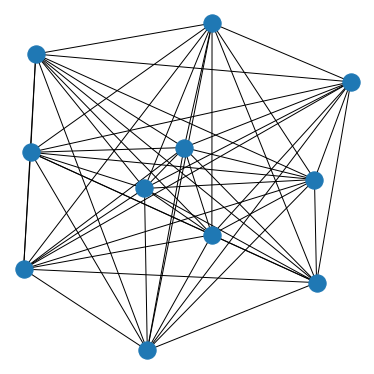

In [5]:
i=df[0].tolist() 
j=df[1].tolist()
c=df[2].tolist()
k=6 # initialize k trees

G=nx.Graph() 
addList=[]
for l in range(len(i)):
    G.add_edge(i[l],j[l],weight=c[l])
print("nodes:", G.number_of_nodes(), "edges:", G.number_of_edges())

# get adjacency matrix from graph of networkX
adj = nx.linalg.graphmatrix.adjacency_matrix(G).todense()
nx.draw(G)

### Get minimum cost spanning forest with k trees

In [6]:
myClass = Graph(adj, G, k)
myClass.kruskal_algo()

Number of trees: 11
Number of trees: 10
Number of trees: 9
Number of trees: 8
Number of trees: 8
Number of trees: 8
Number of trees: 8
Number of trees: 7
Number of trees: 7

FInal Graph:
0 - 9: 0.000200
6 - 10: 0.000800
6 - 9: 0.008000
4 - 10: 0.013100
0 - 7: 0.029200
Number of trees in final result:  6
